# 多元线性特征分析

分析 抖音直播 影响销量的 特征权重

In [9]:
import pandas as pd
import numpy as np

np.random.seed(42)
n = 100

# 生成有相关性的特征
直播时长 = np.random.randint(1, 6, n)
观众人数 = 直播时长 * 300 + np.random.randint(-50, 50, n)  # 直播时长越长观众越多
互动次数 = 观众人数 // 10 + np.random.randint(-10, 10, n)  # 观众多互动多
点赞数 = 互动次数 * 5 + np.random.randint(-20, 20, n)      # 互动多点赞多
短视频引流量 = np.random.randint(0, 1000, n)
商品价格 = np.random.randint(20, 200, n)
# 假设销量主要受观众人数、互动次数、价格影响
销量 = (观众人数 * 0.2 + 互动次数 * 0.5 - 商品价格 * 0.3 +
      短视频引流量 * 0.05 + np.random.randint(-30, 30, n)).astype(int)
销量 = np.clip(销量, 10, None)  # 保证销量不小于10

data = {
    '直播时长': 直播时长,
    '观众人数': 观众人数,
    '互动次数': 互动次数,
    '点赞数': 点赞数,
    '短视频引流量': 短视频引流量,
    '商品价格': 商品价格,
    '销量': 销量
}

df = pd.DataFrame(data)
df.to_csv('抖音直播特征分析样例.csv', index=False, encoding='utf-8-sig')
print(df.head())

   直播时长  观众人数  互动次数  点赞数  短视频引流量  商品价格   销量
0     4  1177   108  527      57   160  221
1     5  1456   139  701     633    31  400
2     3   922    82  416     512   114  230
3     5  1521   142  723     750    65  363
4     5  1461   154  770     801   149  355


## 热力图分析

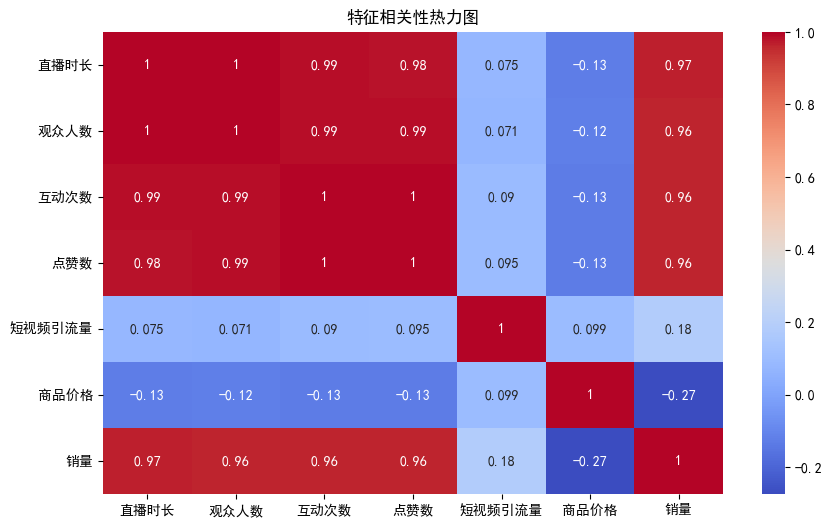

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文字体为黑体
plt.rcParams['axes.unicode_minus'] = False    # 正常显示负号

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('特征相关性热力图')
plt.show()

热力图  只能 表达较为单一 的 关系影响，  如果需要分析 多重因素 需要 进行 多元线性回归 

## 多元线性回归特征分析

In [ ]:
# scientific toolkit 科学工具包

from sklearn.linear_model import LinearRegression

x = df.drop(columns=['销量'])
y = df['销量']

model = LinearRegression()
model.fit(x, y)
print(model.coef_)   # coefficient 系数
coef = pd.Series(model.coef_, index=x.columns)

print("各特征对销量的回归系数（权重）:")
print(coef)

# 输出截距
print(f"截距: {model.intercept_:.2f}")

[ 4.83408226e+01  9.74203365e-03  1.93420525e+00 -2.38223328e-01
  4.81510522e-02 -3.42980537e-01]
各特征对销量的回归系数（权重）:
直播时长      48.340823
观众人数       0.009742
互动次数       1.934205
点赞数       -0.238223
短视频引流量     0.048151
商品价格      -0.342981
dtype: float64
截距: 10.50
